# Simulación de procesos financieros

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="110px" height="70px" />


### Integrantes:

>#### Juan Mario Ochoa
>#### Oscar Germán Villa

### 1 Título del trabajo
> Portafolios de Inversión Finec Asset Management 

### Objetivos

#### 2.2 Objetivo general
> Crear portafolios óptimos para los clientes en base a los requerimientos de cada uno de ellos.

#### 2.3 Objetivos específicos

### Definición del problema

Es un hecho que hoy en día el apoyo en las nuevas tecnologías es algo imperativo para la prosperidad de un negocio. Estas tecnologías no se encuentran ausentes en el mundo de las finanzas, donde la automatización de los procesos que la tecnología representa no solo es más efectiva por ser más rápida, sino más precisa.

La empresa con la que se trabajará en conjunto es Finec Asset Management S.A. de C.V. misma que ha estado en el mercado por más de 20 años y opera como un grupo de asesoría en inversión independiente. Presentan distintas maneras de apoyo a sus clientes, desde banca privada o patrimonial, hasta el wealth management, todo con el mismo objetivo, un óptimo manejo de los activos para obtener rendimientos atractivos para sus clientes. El objetivo de nuestra colaboración va enfocado a una nueva rama que se busca en la firma, con el afán de crecer no sólo en el ámbito internacional, que ya se encuentra firme, sino también con productos nacionales y así ampliar el espectro de sus posibles clientes.

Actualmente Finec busca abrir su rango de operaciones y empezar a gestionar portafolios con diferentes activos de la Bolsa Mexicana de Valores BMV. La intención es utilizar un número no definido aún de activos para la realización de portafolio, en conjunto con una base de bonos para emular una parte libre de riesgo en el portafolio. Al ser un proyecto nuevo, muchas cosas aún se tienen que definir, por ejemplo la cantidad de activos (ya que en un punto la relación riesgo/ se mueve de manera indiferente al número de activos) y cuáles serán (al ser primera vez que se hace, se tiene que seleccionar bien los activos que le proporcionen seguridad tanto a la empresa como al cliente). La intención es que cada cliente proporcionará un rango de rendimiento que deseé, o en su defecto, ya un rendimiento exacto. De la misma manera se le entregará al cliente el resultados del VaR (valor en riesgo) para que este tenga mayor conocimiento sobre los riesgos que conlleva su inversión. 


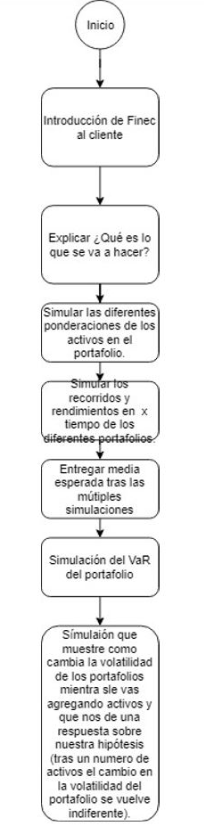

### Nodos y variables

Los escenarios que se presentarán en el proyecto son los siguientes:

Introducción con el cliente: Una explicación escrita en la que se le informará al cliente cómo se va a trabajar con su dinero, cuáles son los supuestos del mercado y cómo serán los resultados que ellos podrán esperar al invertir con Finec.

Simulación de ponderaciones: De acuerdo al perfil del cliente y el rendimiento esperado solicitado, se realizará una simulación para las posibles ponderaciones de activos en su portafolio.

Simulación de resultados: Una vez obtenidas las ponderaciones, se simulará una proyección del comportamiento de las diferentes carteras.

Entrega de rendimiento esperado: En este medio es muy importante recalcar que los resultados jamás se aseguran, sino que se esperan. Al terminar las simulaciones, se le muestran al cliente para su visto bueno.

Simulación del VaR: Presentación de la medida de riesgo más utilizada en el mundo para describir el riesgo al que está expuesto la cartera de los clientes.

Simulación de volatilidad: Para reafirmar nuestra propuesta, será necesario realizar una simulación para justificar el número de activos que fueron seleccionados para la creación de la cartera, esta simulación se pretende realizar en función a la volatilidad y el cambio en ella al aumentar o disminuir la diversificación del portafolio.

### Hipótesis y supuestos

Hipótesis: es evidente que con la diversificación de un portafolio el riesgo debe de disminuir, pero dicho nivel de diversificación se va a estancar casi siempre en un mismo punto. Con esto se quiere inferir que tras un número de diferentes activos en el portafolio, el nivel de riesgo con el que se trabaja será indiferente por más activos que se le desee agregar. De hecho, jamás se logrará que dicho riesgo en el portafolio sea cero.

Los supuestos que se manejan para presentar el proyecto al cliente por el momento son los siguientes:
Los rendimientos que se entregarán y utilizarán serán diarios.
Los resultados, al ser diarios van a cambiar con el tiempo (el rendimiento y VaR n serán el mismo si la inversión se hace hoy o mañana).
El VaR también se calculará diario.
Para la creación de portafolio se utilizarán datos históricos de los activos que cotizan en la Bolsa de Valores mexicana.
Para el VaR se utilizarán x datos y se realizará histórico.
El VaR se entregará con un nivel de confianza de 95% a una cola. 

### Obtención de bases de datos

Gracias al trabajo en conjunto con Finec, la obtención de datos es sencilla.

Los datos históricos de todos los activos que cotizan en la bolsa serán brindados por la empresa, vía Bloomberg, permitiéndonos así mucha más información que otras plataformas.

La categorización tanto de los perfiles de riesgo, como de los activos también será brindada por Finec. Como se ha comentado co anterioridad, se debe trabajar cuidando el perfil del cliente para no caer en algún tipo de incumplimiento, por lo que es necesario delimitar los activos.

Algo extra a considerar es depurar la base, dado que solamente nos brindaron los datos crudos, como podemos observar a continuación.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
pd.set_option('display.max_rows', 10)
data = pd.read_excel('Data/Equity_Clean.xlsx')
data

,UAL UW Equity,USB UN Equity,NFLX UW Equity,MS UN Equity,CAH UN Equity,GS UN Equity,PRU UN Equity,MTB UN Equity,XRX UN Equity,DAL UN Equity,...,BAC UN Equity,FITB UW Equity,MCK UN Equity,MCD UN Equity,BBT UN Equity,JNJ UN Equity,OMC UN Equity,DISH UW Equity,CINF UW Equity,TMK UN Equity
2008-01-04,33.15,29.44,3.521,49.30,40.4044,199.93,90.45,75.85,39.8087,13.37,...,39.85,23.79,63.25,57.05,27.36,65.84,45.50,33.48,37.76,26.5244
2008-01-11,32.07,29.85,3.344,48.39,43.9874,198.74,91.36,73.75,37.6220,15.48,...,38.50,24.36,67.80,54.32,28.16,67.88,45.00,30.40,37.65,27.2356
2008-01-18,32.94,30.19,3.121,45.11,42.7309,187.21,80.00,73.69,34.9347,15.14,...,35.97,22.60,64.80,52.40,29.42,66.29,42.75,27.95,35.10,25.7733
2008-01-25,34.87,32.96,3.110,48.89,40.5121,191.37,79.38,83.85,38.0962,16.21,...,39.48,24.49,60.40,54.10,34.01,62.46,43.89,28.15,35.49,25.7111
2008-02-01,41.14,34.00,3.627,48.25,42.8745,207.78,85.29,94.03,41.6002,18.53,...,45.03,28.06,61.41,54.22,36.80,63.36,46.41,31.17,38.84,27.6089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-07,87.68,54.19,348.680,48.22,52.6200,233.91,98.29,178.81,26.9700,56.86,...,30.86,29.49,129.74,163.90,51.98,137.32,69.87,35.29,77.16,88.3900
2018-09-14,90.33,54.14,364.560,48.19,52.1000,229.24,99.86,171.22,28.0700,57.93,...,30.37,29.02,128.56,160.84,50.21,139.49,68.98,36.38,77.77,86.8400
2018-09-21,89.94,55.14,361.190,49.41,54.9400,235.34,104.68,173.00,28.0000,59.61,...,31.03,29.50,134.95,165.30,51.44,142.88,70.90,36.51,79.03,88.8900
2018-09-28,89.06,52.81,374.130,46.57,54.0000,224.24,101.32,164.54,26.9800,57.83,...,29.46,27.92,132.65,167.29,48.54,138.17,68.02,35.76,76.81,86.6900


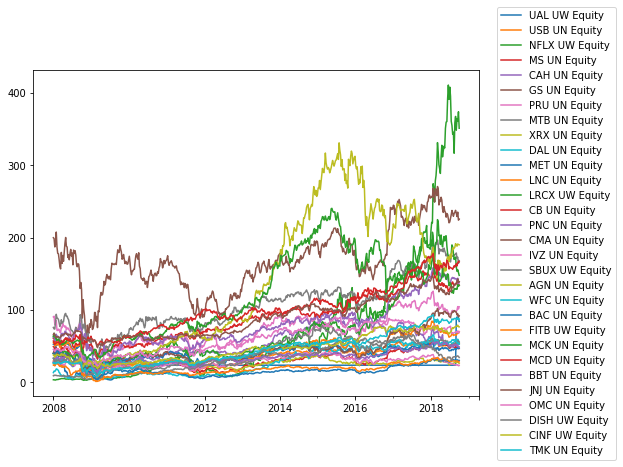

In [19]:
data.plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [10]:
def daily_ret(data):
    return np.log(data/data.shift(1)).dropna()

In [11]:
returns = daily_ret(data)
returns

,UAL UW Equity,USB UN Equity,NFLX UW Equity,MS UN Equity,CAH UN Equity,GS UN Equity,PRU UN Equity,MTB UN Equity,XRX UN Equity,DAL UN Equity,...,BAC UN Equity,FITB UW Equity,MCK UN Equity,MCD UN Equity,BBT UN Equity,JNJ UN Equity,OMC UN Equity,DISH UW Equity,CINF UW Equity,TMK UN Equity
2008-01-11,-0.033122,0.013831,-0.051577,-0.018631,0.084965,-0.005970,0.010011,-0.028077,-0.056496,0.146535,...,-0.034464,0.023677,0.069467,-0.049036,0.028820,0.030514,-0.011050,-0.096506,-0.002917,0.026460
2008-01-18,0.026767,0.011326,-0.069014,-0.070189,-0.028981,-0.059766,-0.132781,-0.000814,-0.074108,-0.022209,...,-0.067973,-0.074993,-0.045257,-0.035986,0.043772,-0.023702,-0.051293,-0.084025,-0.070132,-0.055186
2008-01-25,0.056939,0.087784,-0.003531,0.080469,-0.053322,0.021978,-0.007780,0.129162,0.086634,0.068288,...,0.093109,0.080315,-0.070316,0.031928,0.144980,-0.059513,0.026317,0.007130,0.011050,-0.002416
2008-02-01,0.165354,0.031066,0.153783,-0.013177,0.056677,0.082271,0.071811,0.114584,0.087990,0.133763,...,0.131535,0.136080,0.016584,0.002216,0.078843,0.014306,0.055828,0.101909,0.090200,0.071215
2008-02-08,-0.029102,-0.050056,0.057067,-0.110787,0.012150,-0.104997,-0.171198,-0.056214,-0.029565,-0.018519,...,-0.065857,-0.089022,-0.062662,0.025853,-0.096942,-0.021215,-0.018046,-0.065973,-0.027671,-0.038062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-07,1.311177,0.001477,-0.053058,-0.012571,0.008205,-0.016536,0.000407,0.009327,-0.032467,-0.028093,...,-0.002266,0.002037,0.007660,0.010241,0.006175,0.019338,0.007903,-0.001699,0.006371,0.005332
2018-09-14,0.029776,-0.000923,0.044537,-0.000622,-0.009931,-0.020167,0.015847,-0.043375,0.039976,0.018643,...,-0.016006,-0.016066,-0.009137,-0.018846,-0.034645,0.015679,-0.012820,0.030420,0.007875,-0.017691
2018-09-21,-0.004327,0.018302,-0.009287,0.025001,0.053077,0.026262,0.047139,0.010342,-0.002497,0.028588,...,0.021499,0.016405,0.048509,0.027352,0.024202,0.024012,0.027454,0.003567,0.016072,0.023332
2018-09-28,-0.009832,-0.043175,0.035199,-0.059196,-0.017258,-0.048314,-0.032624,-0.050138,-0.037109,-0.030316,...,-0.051921,-0.055047,-0.017190,0.011967,-0.058028,-0.033520,-0.041469,-0.020756,-0.028493,-0.025061


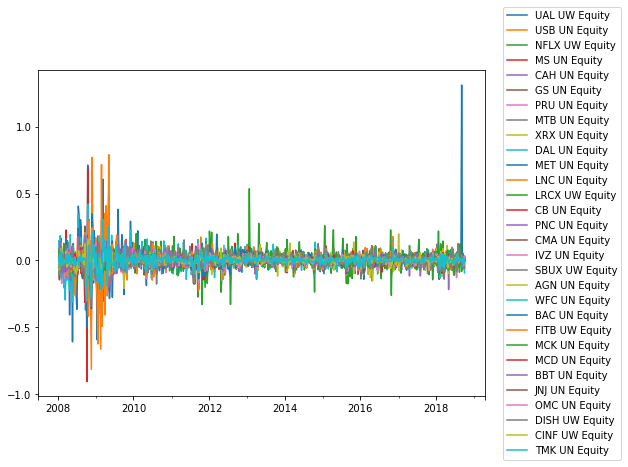

In [20]:
returns.plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)